# Train the StarNet Model

This notebook takes you through the steps of how to train a StarNet Model
- Required Python packages: `numpy h5py keras`
- Required data files: training_data.h5, mean_and_std.npy

Note: We use tensorflow for the keras backend.

In [55]:
import numpy as np
import h5py
import random
import keras
from keras.models import Model
from keras.layers import Input, Dense, InputLayer, Flatten, Reshape, Concatenate, concatenate
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import Adam
import tensorflow as tf
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import HDF5Matrix
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc


#Loading the data

#RVSFlux normalized
#pathrvs = 'norm_rvsflux.h5'
#readrvs = h5py.File(pathrvs, 'r')
#print(readrvs.keys())
#rvs = readrvs.get('normrvs')
#norm_rvsflux = np.array(rvs)
#readrvs.close()

#type(rvs)
#print('shape of rvsflux:', np.shape(norm_rvsflux))


In [56]:

#BPFlux
#pathbp = 'bpflux.h5'
#readbp = h5py.File(pathbp, 'r')
#print('total number of wave and flux in the folder:'len(readbp.keys()))
#bpflux = readbp.get('bpflux0')
#bpflux = np.array(bpflux)


#norm_bpflux= []

#for ii in range(np.shape(norm_rvsflux)[0]):
    #if ii%50 == 0: #i=i/100
        #print('star #',ii)
        #fluxlabel = 'bpflux'+str(ii)
        #wavelabel = 'bpwave' +str(ii)
        #flux = readbp.get(fluxlabel)
        #wave= readbp.get(wavelabel)
    
        
        #flux = np.array(flux)
        #wave = np.array(wave)
        #print('flux is:', flux)
        
        #max_flux=np.max(flux)
        #print('maxflux:', max_flux)
        #normflux = flux/ max_flux
        #print('normflux:',normflux)
        
        
        
        #plt.plot(wave, flux)
        #plt.scatter(wave,flux, color='red')
        #plt.show()
    
        
        #norm_bpflux.append(normflux)


        
#norm_bpflux= np.array(norm_bpflux)

#print('shape of norm bpflux:', np.shape(norm_bpflux))
#print('shape of norm bpflux:', print(norm_bpflux[0:10]))









In [57]:
#RPFlux
pathrp = '/Users/aishasultan/work/synple-gaia/run/CNN/age_parameter/RP/spectra/spectra_feh_pos00+pos.25+neg.25.h5'
readrp = h5py.File(pathrp, 'r')
print(readrp.keys())
rpflux = readrp.get('rpflux')
rpflux = np.array(rpflux)
print('shape of rpflux:', np.shape(rpflux))


norm_rpflux= []
for ii in range(np.shape(rpflux)[0]):
        max_flux= np.max(rpflux[ii])
        normflux = rpflux[ii]/ max_flux
        #plt.plot(np.arange(40), normflux)
        #print('normflux:',normflux)
        norm_rpflux.append(normflux)

        
norm_rpflux= np.array(norm_rpflux)

#print('shape of norm_rpflux:', np.shape(norm_rpflux))
#print('output of norm_flux:', print(norm_rpflux[0:10]))







<KeysViewHDF5 ['rpflux']>
shape of rpflux: (300, 40)


In [58]:
mist0 = '/Users/aishasultan/work/MIST/feh_pos0.00_100randstr_EEP0.h5'
mist1 = '/Users/aishasultan/work/MIST/feh_pos.25_100randstr_EEP0.h5'
mist2 = '/Users/aishasultan/work/MIST/feh_neg.25_100randstr_EEP0.h5'



readmist0 = h5py.File(mist0, 'r')
readmist1 = h5py.File(mist1, 'r')
readmist2 = h5py.File(mist2, 'r')


#reading MIST0 file
print(readmist0.keys())
mist_logteff0 = readmist0.get('logteff_sel')
teff_sel0 = np.array(mist_logteff0)
mist_logg0 = readmist0.get ('logg_sel')
logg_sel0 = np.array(mist_logg0)
mist_feh0 = readmist0.get ('feh_sel')
feh_sel0 = np.array(mist_feh0)
mist_age0 = readmist0.get ('age_sel')
age_sel0 = np.array(mist_age0)


#reading MIST1 file
#print(readmist1.keys())
mist_logteff1 = readmist1.get('logteff_sel')
teff_sel1 = np.array(mist_logteff1)
mist_logg1 = readmist1.get ('logg_sel')
logg_sel1 = np.array(mist_logg1)
mist_feh1 = readmist1.get ('feh_sel')
feh_sel1 = np.array(mist_feh1)
mist_age1 = readmist1.get ('age_sel')
age_sel1 = np.array(mist_age1)

#reading MIST2 file
#print(readmist1.keys())
mist_logteff2 = readmist2.get('logteff_sel')
teff_sel2 = np.array(mist_logteff2)
mist_logg2 = readmist2.get ('logg_sel')
logg_sel2 = np.array(mist_logg2)
mist_feh2 = readmist2.get ('feh_sel')
feh_sel2 = np.array(mist_feh2)
mist_age2 = readmist2.get ('age_sel')
age_sel2 = np.array(mist_age2)


#MIST all parameters
logteff = np.hstack((teff_sel0, teff_sel1, teff_sel2))
logg = np.hstack ((logg_sel0, logg_sel1, logg_sel2))
feh = np.hstack ((feh_sel0, feh_sel1, feh_sel2))
age = np.hstack ((age_sel0, age_sel1, age_sel2))



print(age.max())
print(feh)

<KeysViewHDF5 ['age_sel', 'feh_sel', 'logg_sel', 'logteff_sel']>
10.3
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.

In [59]:

#features
num_tot = len(logteff)
print('total number of input stars =', num_tot)
plim = 0.8
ran_frac = np.random.uniform(0,1,num_tot)
#print('ranfrac=' , ran_frac)




#Input flux data of RVS, BP, RP
#x_RVStrain = norm_rvsflux[ran_frac < plim, :]
#print('number of RVS training data=', len(x_RVStrain[:,0]))
#x_RVScv = norm_rvsflux[ran_frac >= plim, :] #test set we left for the application

#x_BPtrain = norm_bpflux[ran_frac < plim, :]
#print('number of BP training data=', len(x_BPtrain[:,0]))
#x_BPcv = norm_bpflux[ran_frac >= plim, :]

x_RPtrain =norm_rpflux[ran_frac < plim, :]
print('number of RP training data=', len(x_RPtrain[:,0]))
x_RPcv = norm_rpflux[ran_frac >= plim, :]


#print('x_BPtrain', x_BPtrain)

#x_train_combined = np.vstack (x_RVStrain[0,:],x_RPtrain[0,:]) 

#output label which is the logteff, log g, feh, and age
y_logteff_train = logteff[ran_frac< plim]
y_logteff_cv = logteff[ran_frac >= plim] #test set

y_logg_train = logg[ran_frac< plim]
y_logg_cv = logg[ran_frac >= plim] #test set

y_feh_train = feh[ran_frac< plim]
y_feh_cv = feh[ran_frac >= plim] #test set

y_age_train = age[ran_frac< plim]
y_age_cv = age[ran_frac >= plim] #test set




print('The size of CVS for the input flux data')
#print('RVS cvs=', np.shape(x_RVScv))
#print('BP cvs=', np.shape(x_BPcv))
print('RP cvs=', np.shape(x_RPcv))

print('the size of output label=', np.shape(y_logteff_train) )

#id = np.linspace(0, len(x_RVStrain[:, 0])-1, len(x_RVStrain[:, 0]))
#plt.plot(id, y_logteff_train)
#plt.show()


total number of input stars = 300
number of RP training data= 237
The size of CVS for the input flux data
RP cvs= (63, 40)
the size of output label= (237,)


** Normalization **

Write a function to normalize the output labels. Each label will be normalized to have approximately have a mean of zero and unit variance.

NOTE: This is necessary to put output labels on a similar scale in order for the model to train properly, this process is reversed in the test stage to give the output labels their proper units

In [60]:
#mean_labels=np.mean(logteff)
#std_labels=np.std(logteff)
#print('mean and std teff=', mean_labels, std_labels)
def normalize(labels):
    # Normalize labels
    mean_labels=np.mean(labels)
    std_labels=np.std(labels)
    return (labels-mean_labels) / std_labels





In [61]:
#normalize the y labels, the log teff and log g 

#output label which is the logteff and log g
y_logteff_train = normalize(y_logteff_train)
y_logteff_cv = normalize(y_logteff_cv)

y_logg_train = normalize(y_logg_train)
y_logg_cv = normalize(y_logg_cv)

y_feh_train = normalize(y_feh_train)
y_feh_cv = normalize(y_feh_cv) #test set

y_age_train = normalize(y_age_train)
y_age_cv = normalize(y_age_cv) #test set


print('type of data ', type(y_logteff_train),type(y_logteff_cv),
      type(y_logg_train),type(y_logg_cv), 
     type(y_feh_train),type(y_feh_cv), 
     type(y_age_train), type(y_age_cv))


type of data  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


**Build the StarNet model architecture**

The StarNet architecture is built with:
- input layer
- 2 convolutional layers
- 1 maxpooling layer followed by flattening for the fully connected layer
- 2 fully connected layers
- output layer

First, let's define some model variables.

In [62]:
# activation function used following every layer except for the output layers
activation = 'relu'
#activation = 'sigmoid'

# model weight initializer
initializer = 'he_normal'

# number of filters used in the convolutional layers
#num_filters = [4,16]
num_filters = [8,32]
#num_filters = [8,16]

# length of the filters in the convolutional layers
#filter_length = 8
#filter_length = 16
filter_length = 8

# length of the maxpooling window 
pool_length = 4

# number of nodes in each of the hidden fully connected layers
num_hidden = [256,128]
#num_hidden = [24,12]

# number of spectra fed into model at once during training
batch_size = 64

# maximum number of interations for model training
#max_epochs = 200
#max_epochs = 100
#max_epochs = 150 
#max_epochs = 350
#max_epochs = 225
#max_epochs = 180
#max_epochs = 450
#max_epochs = 300
max_epochs = 300


# initial learning rate for optimization algorithm
lr = 0.000003 #handled by Adam
    
# exponential decay rate for the 1st moment estimates for optimization algorithm
beta_1 = 0.9

# exponential decay rate for the 2nd moment estimates for optimization algorithm
beta_2 = 0.999

# a small constant for numerical stability for optimization algorithm
optimizer_epsilon = 1e-08

In [63]:
#num_RVSfluxes=len(x_RVStrain[0,:]) 
#print('number of RVS fluxes=', num_RVSfluxes)

#num_BPfluxes=len(x_BPtrain[0,:]) 
#print('number of BP fluxes=', num_BPfluxes)

num_RPfluxes=len(x_RPtrain[0,:]) 
print('number of RP fluxes=', num_RPfluxes)

#num_labels= 1
num_labels= 4
print('number of training labels=', num_labels)

#ilam = np.linspace(0, num_fluxes-1, num_fluxes)
#plt.plot(ilam, x_train[329, :])
#plt.plot()

#iy = np.linspace(0, len(y_train)-1, len(y_train))
#plt.plot(iy, y_train)
#plt.plot()


number of RP fluxes= 40
number of training labels= 4


In [64]:

# Input RVS spectra
# print(' num_RVSfluxes=', num_RVSfluxes)
#input_RVSspec = Input(shape=(num_RVSfluxes,), name='rvs_input_x' ) #removed name='starnet_input_x'

# Reshape spectra for RVS layers
#cur_rvs = Reshape((num_RVSfluxes, 1))(input_RVSspec)

# CNN layers
#cur_rvs = Conv1D(kernel_initializer=initializer, activation=activation, 
                #padding="same", filters=num_filters[0], kernel_size=filter_length)(cur_rvs) #first CNN layer
#cur_rvs = Conv1D(kernel_initializer=initializer, activation=activation,
                #padding="same", filters=num_filters[1], kernel_size=filter_length)(cur_rvs) #2nd CNN layer

# Max pooling layer
#cur_rvs = MaxPooling1D(pool_size=pool_length)(cur_rvs)

# Flatten the current input for the fully-connected layers
#cur_rvs = Flatten()(cur_rvs)


##############################################################################################


# Input BP spectra
# print(' num_BPfluxes=', num_BPfluxes)
#input_BPspec = Input(shape=(num_BPfluxes,), name='bp_input_x' ) #removed name='starnet_input_x'

# Reshape spectra for BP layers
#cur_bp = Reshape((num_BPfluxes, 1))(input_BPspec)

# CNN layers
#cur_bp = Conv1D(kernel_initializer=initializer, activation=activation, 
                #padding="same", filters=num_filters[0], kernel_size=filter_length)(cur_bp) #first CNN layer
#cur_bp = Conv1D(kernel_initializer=initializer, activation=activation,
                #padding="same", filters=num_filters[1], kernel_size=filter_length)(cur_bp) #2nd CNN layer

# Max pooling layer
#cur_bp = MaxPooling1D(pool_size=pool_length)(cur_bp)


# Flatten the current input for the fully-connected layers
#cur_bp = Flatten()(cur_bp)


################################################################################################

# Input RP spectra
input_RPspec = Input(shape=(num_RPfluxes,), name='rp_input_x' ) #removed name='starnet_input_x'

# Reshape spectra for CNN layers
cur_rp = Reshape((num_RPfluxes, 1))(input_RPspec)

# CNN layers
cur_rp = Conv1D(kernel_initializer=initializer, activation=activation, 
                padding="same", filters=num_filters[0], kernel_size=filter_length)(cur_rp) #first CNN layer
cur_rp = Conv1D(kernel_initializer=initializer, activation=activation,
                padding="same", filters=num_filters[1], kernel_size=filter_length)(cur_rp) #2nd CNN layer

# Max pooling layer
cur_rp = MaxPooling1D(pool_size=pool_length)(cur_rp)

# Flatten the current input for the fully-connected layers
cur_rp = Flatten()(cur_rp)

###############################################################################################

#concatenate RVS/BP/RP and then insert it to dense layer 

#cur_comb = concatenate([cur_rvs, cur_bp, cur_rp])

cur_comb = cur_rp

# Fully-connected layers
cur_final = Dense(units=num_hidden[0], kernel_initializer=initializer, 
               activation=activation)(cur_comb)
cur_final = Dense(units=num_hidden[1], kernel_initializer=initializer, 
               activation=activation)(cur_final)

# Output nodes
output_final = Dense(units=num_labels, activation="linear", 
                    input_dim=num_hidden[1], name='output_y')(cur_final)


#model = Model(inputs = [input_RVSspec, input_BPspec, input_RPspec], outputs=output_final)

model = Model(inputs = [input_RPspec], outputs=output_final)




**More model techniques**
* The `Adam` optimizer is the gradient descent algorithm used for minimizing the loss function
* `EarlyStopping` uses the cross-validation set to test the model following every iteration and stops the training if the cv loss does not decrease by `min_delta` after `patience` iterations
* `ReduceLROnPlateau` is a form of learning rate decay where the learning rate is decreased by a factor of `factor` if the training loss does not decrease by `epsilon` after `patience` iterations unless the learning rate has reached `min_lr`

In [65]:
# Default loss function parameters
early_stopping_min_delta = 0.0007
early_stopping_patience = 4
reduce_lr_factor = 0.5
reuce_lr_epsilon = 0.0000009
reduce_lr_patience = 2
reduce_lr_min = 0.00008

# loss function to minimize
loss_function = 'mean_squared_error'

# compute mean absolute deviation
metrics = ['mae', 'mse']
#metrics = ['mae']

In [66]:
#optimizer = Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=optimizer_epsilon, decay=0.0)
optimizer = Adam(lr=0.0005 )

early_stopping = EarlyStopping(monitor='val_loss', min_delta=early_stopping_min_delta, 
                                       patience=early_stopping_patience, verbose=2, mode='min')

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, epsilon=reuce_lr_epsilon, 
                                  patience=reduce_lr_patience, min_lr=reduce_lr_min, mode='min', verbose=2)

**Compile model**

In [67]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rp_input_x (InputLayer)      (None, 40)                0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 40, 1)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 40, 8)             72        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 40, 32)            2080      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               82176     
__________

**Train model**

In [68]:

#history = model.fit(x_train, y_train, validation_data=(x_cv, y_cv),
          #epochs=max_epochs, verbose=1, shuffle='batch',
         #callbacks=[early_stopping, reduce_lr])
        

y_train_stack = np.column_stack((y_logteff_train, y_logg_train, y_feh_train, y_age_train))
y_cv_stack = np.column_stack ((y_logteff_cv, y_logg_cv, y_feh_cv, y_age_cv))

print('shape of the cv logteff and logg=', np.shape(y_cv_stack))
print(' shape of y teff and logg=', np.shape(y_train_stack))
                                
#history = model.fit(x=[x_RVStrain, x_BPtrain, x_RPtrain], y=y_train_stack,
          #validation_split=0.2, epochs=max_epochs, verbose=1, shuffle='batch')
        
#history = model.fit(x=[x_RVStrain, x_BPtrain, x_RPtrain], y= y_train_stack, 
                    #validation_data=([x_RVScv, x_BPcv, x_RPcv], y_cv_stack),
          #epochs=max_epochs, verbose=1, shuffle='batch')

history = model.fit(x=[ x_RPtrain], y= y_train_stack, 
                    validation_data=([x_RPcv], y_cv_stack),
          epochs=max_epochs, verbose=1, shuffle='batch')



shape of the cv logteff and logg= (63, 4)
 shape of y teff and logg= (237, 4)
Train on 237 samples, validate on 63 samples
Epoch 1/300
237/237 [==============================] - 2s 7ms/step - loss: 1.4530 - mean_absolute_error: 0.9702 - mean_squared_error: 1.4530 - val_loss: 1.2122 - val_mean_absolute_error: 0.8570 - val_mean_squared_error: 1.2122
Epoch 2/300
237/237 [==============================] - 0s 321us/step - loss: 0.9930 - mean_absolute_error: 0.7783 - mean_squared_error: 0.9930 - val_loss: 0.8541 - val_mean_absolute_error: 0.7935 - val_mean_squared_error: 0.8541
Epoch 3/300
237/237 [==============================] - 0s 199us/step - loss: 1.0036 - mean_absolute_error: 0.8395 - mean_squared_error: 1.0036 - val_loss: 0.7341 - val_mean_absolute_error: 0.7131 - val_mean_squared_error: 0.7341
Epoch 4/300
237/237 [==============================] - 0s 251us/step - loss: 0.8867 - mean_absolute_error: 0.7209 - mean_squared_error: 0.8867 - val_loss: 0.7063 - val_mean_absolute_error: 0.6

237/237 [==============================] - 0s 145us/step - loss: 0.5719 - mean_absolute_error: 0.5468 - mean_squared_error: 0.5719 - val_loss: 0.5185 - val_mean_absolute_error: 0.5144 - val_mean_squared_error: 0.5185
Epoch 37/300
237/237 [==============================] - 0s 148us/step - loss: 0.5605 - mean_absolute_error: 0.5482 - mean_squared_error: 0.5605 - val_loss: 0.5215 - val_mean_absolute_error: 0.5221 - val_mean_squared_error: 0.5215
Epoch 38/300
237/237 [==============================] - 0s 148us/step - loss: 0.6109 - mean_absolute_error: 0.5717 - mean_squared_error: 0.6109 - val_loss: 0.5288 - val_mean_absolute_error: 0.5332 - val_mean_squared_error: 0.5288
Epoch 39/300
237/237 [==============================] - 0s 146us/step - loss: 0.5620 - mean_absolute_error: 0.5482 - mean_squared_error: 0.5620 - val_loss: 0.5166 - val_mean_absolute_error: 0.5125 - val_mean_squared_error: 0.5166
Epoch 40/300
237/237 [==============================] - 0s 148us/step - loss: 0.5761 - mean_a

Epoch 72/300
237/237 [==============================] - 0s 146us/step - loss: 0.4523 - mean_absolute_error: 0.4807 - mean_squared_error: 0.4523 - val_loss: 0.4556 - val_mean_absolute_error: 0.4899 - val_mean_squared_error: 0.4556
Epoch 73/300
237/237 [==============================] - 0s 151us/step - loss: 0.4501 - mean_absolute_error: 0.4776 - mean_squared_error: 0.4501 - val_loss: 0.4562 - val_mean_absolute_error: 0.4923 - val_mean_squared_error: 0.4562
Epoch 74/300
237/237 [==============================] - 0s 147us/step - loss: 0.4816 - mean_absolute_error: 0.4956 - mean_squared_error: 0.4816 - val_loss: 0.4547 - val_mean_absolute_error: 0.4695 - val_mean_squared_error: 0.4547
Epoch 75/300
237/237 [==============================] - 0s 147us/step - loss: 0.4816 - mean_absolute_error: 0.5000 - mean_squared_error: 0.4816 - val_loss: 0.4668 - val_mean_absolute_error: 0.4870 - val_mean_squared_error: 0.4668
Epoch 76/300
237/237 [==============================] - 0s 147us/step - loss: 0.

237/237 [==============================] - 0s 145us/step - loss: 0.4186 - mean_absolute_error: 0.4631 - mean_squared_error: 0.4186 - val_loss: 0.4343 - val_mean_absolute_error: 0.4536 - val_mean_squared_error: 0.4343
Epoch 108/300
237/237 [==============================] - 0s 145us/step - loss: 0.4313 - mean_absolute_error: 0.4665 - mean_squared_error: 0.4313 - val_loss: 0.4334 - val_mean_absolute_error: 0.4545 - val_mean_squared_error: 0.4334
Epoch 109/300
237/237 [==============================] - 0s 149us/step - loss: 0.4095 - mean_absolute_error: 0.4553 - mean_squared_error: 0.4095 - val_loss: 0.4355 - val_mean_absolute_error: 0.4711 - val_mean_squared_error: 0.4355
Epoch 110/300
237/237 [==============================] - 0s 144us/step - loss: 0.4220 - mean_absolute_error: 0.4611 - mean_squared_error: 0.4220 - val_loss: 0.4389 - val_mean_absolute_error: 0.4670 - val_mean_squared_error: 0.4389
Epoch 111/300
237/237 [==============================] - 0s 145us/step - loss: 0.4115 - me

237/237 [==============================] - 0s 147us/step - loss: 0.4077 - mean_absolute_error: 0.4469 - mean_squared_error: 0.4077 - val_loss: 0.4208 - val_mean_absolute_error: 0.4469 - val_mean_squared_error: 0.4208
Epoch 143/300
237/237 [==============================] - 0s 149us/step - loss: 0.4007 - mean_absolute_error: 0.4439 - mean_squared_error: 0.4007 - val_loss: 0.4287 - val_mean_absolute_error: 0.4763 - val_mean_squared_error: 0.4287
Epoch 144/300
237/237 [==============================] - 0s 157us/step - loss: 0.3979 - mean_absolute_error: 0.4456 - mean_squared_error: 0.3979 - val_loss: 0.4212 - val_mean_absolute_error: 0.4476 - val_mean_squared_error: 0.4212
Epoch 145/300
237/237 [==============================] - 0s 146us/step - loss: 0.3963 - mean_absolute_error: 0.4401 - mean_squared_error: 0.3963 - val_loss: 0.4199 - val_mean_absolute_error: 0.4513 - val_mean_squared_error: 0.4199
Epoch 146/300
237/237 [==============================] - 0s 983us/step - loss: 0.3980 - me

237/237 [==============================] - 0s 152us/step - loss: 0.3950 - mean_absolute_error: 0.4438 - mean_squared_error: 0.3950 - val_loss: 0.4103 - val_mean_absolute_error: 0.4346 - val_mean_squared_error: 0.4103
Epoch 178/300
237/237 [==============================] - 0s 161us/step - loss: 0.3944 - mean_absolute_error: 0.4381 - mean_squared_error: 0.3944 - val_loss: 0.4059 - val_mean_absolute_error: 0.4308 - val_mean_squared_error: 0.4059
Epoch 179/300
237/237 [==============================] - 0s 159us/step - loss: 0.3821 - mean_absolute_error: 0.4292 - mean_squared_error: 0.3821 - val_loss: 0.4079 - val_mean_absolute_error: 0.4412 - val_mean_squared_error: 0.4079
Epoch 180/300
237/237 [==============================] - 0s 153us/step - loss: 0.3925 - mean_absolute_error: 0.4396 - mean_squared_error: 0.3925 - val_loss: 0.4129 - val_mean_absolute_error: 0.4430 - val_mean_squared_error: 0.4129
Epoch 181/300
237/237 [==============================] - 0s 154us/step - loss: 0.4001 - me

237/237 [==============================] - 0s 153us/step - loss: 0.3688 - mean_absolute_error: 0.4207 - mean_squared_error: 0.3688 - val_loss: 0.4020 - val_mean_absolute_error: 0.4393 - val_mean_squared_error: 0.4020
Epoch 213/300
237/237 [==============================] - 0s 151us/step - loss: 0.3755 - mean_absolute_error: 0.4243 - mean_squared_error: 0.3755 - val_loss: 0.3904 - val_mean_absolute_error: 0.4212 - val_mean_squared_error: 0.3904
Epoch 214/300
237/237 [==============================] - 0s 152us/step - loss: 0.3710 - mean_absolute_error: 0.4225 - mean_squared_error: 0.3710 - val_loss: 0.3901 - val_mean_absolute_error: 0.4333 - val_mean_squared_error: 0.3901
Epoch 215/300
237/237 [==============================] - 0s 151us/step - loss: 0.3650 - mean_absolute_error: 0.4193 - mean_squared_error: 0.3650 - val_loss: 0.3908 - val_mean_absolute_error: 0.4393 - val_mean_squared_error: 0.3908
Epoch 216/300
237/237 [==============================] - 0s 152us/step - loss: 0.3682 - me

237/237 [==============================] - 0s 160us/step - loss: 0.3565 - mean_absolute_error: 0.4154 - mean_squared_error: 0.3565 - val_loss: 0.3971 - val_mean_absolute_error: 0.4536 - val_mean_squared_error: 0.3971
Epoch 248/300
237/237 [==============================] - 0s 156us/step - loss: 0.3560 - mean_absolute_error: 0.4130 - mean_squared_error: 0.3560 - val_loss: 0.3759 - val_mean_absolute_error: 0.4219 - val_mean_squared_error: 0.3759
Epoch 249/300
237/237 [==============================] - 0s 164us/step - loss: 0.3512 - mean_absolute_error: 0.4093 - mean_squared_error: 0.3512 - val_loss: 0.3792 - val_mean_absolute_error: 0.4118 - val_mean_squared_error: 0.3792
Epoch 250/300
237/237 [==============================] - 0s 157us/step - loss: 0.3549 - mean_absolute_error: 0.4113 - mean_squared_error: 0.3549 - val_loss: 0.3781 - val_mean_absolute_error: 0.4153 - val_mean_squared_error: 0.3781
Epoch 251/300
237/237 [==============================] - 0s 159us/step - loss: 0.3695 - me

237/237 [==============================] - 0s 163us/step - loss: 0.3436 - mean_absolute_error: 0.3992 - mean_squared_error: 0.3436 - val_loss: 0.3829 - val_mean_absolute_error: 0.4384 - val_mean_squared_error: 0.3829
Epoch 283/300
237/237 [==============================] - 0s 163us/step - loss: 0.3370 - mean_absolute_error: 0.3962 - mean_squared_error: 0.3370 - val_loss: 0.3669 - val_mean_absolute_error: 0.4198 - val_mean_squared_error: 0.3669
Epoch 284/300
237/237 [==============================] - 0s 161us/step - loss: 0.3366 - mean_absolute_error: 0.3974 - mean_squared_error: 0.3366 - val_loss: 0.3775 - val_mean_absolute_error: 0.4075 - val_mean_squared_error: 0.3775
Epoch 285/300
237/237 [==============================] - 0s 165us/step - loss: 0.3556 - mean_absolute_error: 0.4138 - mean_squared_error: 0.3556 - val_loss: 0.3852 - val_mean_absolute_error: 0.4354 - val_mean_squared_error: 0.3852
Epoch 286/300
237/237 [==============================] - 0s 166us/step - loss: 0.3655 - me

In [69]:
hist = pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
295,0.361770,0.400402,0.361770,0.336234,0.398386,0.336234,295
296,0.360734,0.416888,0.360734,0.337129,0.394444,0.337129,296
297,0.367362,0.428040,0.367362,0.331291,0.392381,0.331291,297
298,0.368929,0.415177,0.368929,0.334414,0.394790,0.334414,298
299,0.367765,0.430186,0.367765,0.356076,0.401251,0.356076,299


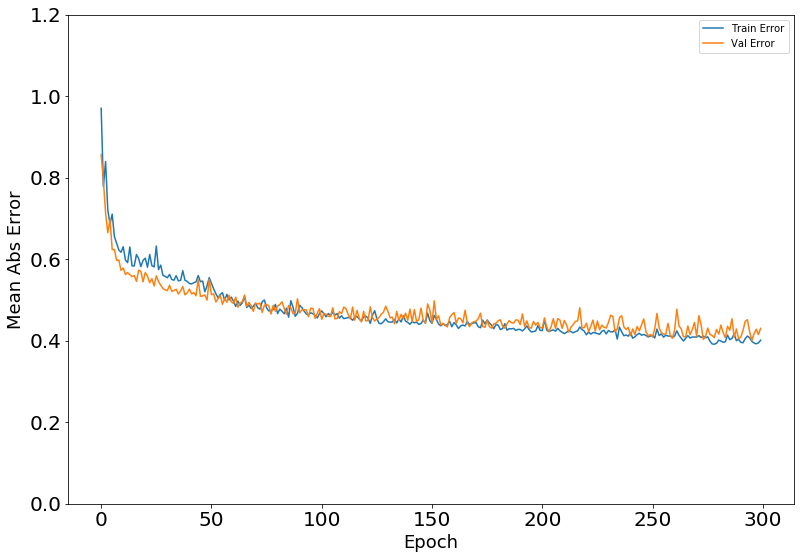

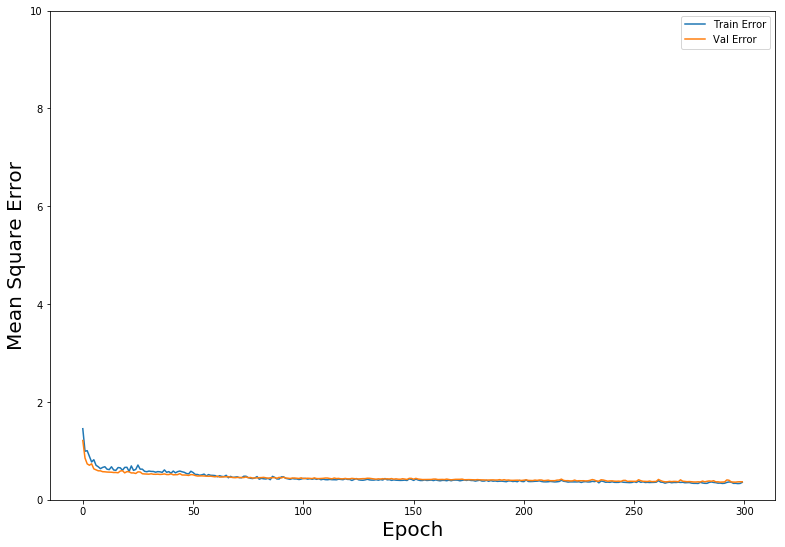

In [70]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
    
  plt.figure(figsize=(13,9))
  #plt.figure()
  plt.xlabel('Epoch', fontsize= 18)
  plt.ylabel('Mean Abs Error', fontsize= 18)
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,1.2])
  plt.tick_params(labelsize=20)
  plt.legend()
  

  plt.figure(figsize=(13,9))
  #plt.figure()
  plt.xlabel('Epoch', fontsize = 20)
  plt.ylabel('Mean Square Error', fontsize= 20)
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()
  plt.show()


plot_history(history)

**Save model**

(237, 4)
(237,)
(237,)
(237,)
(237,)


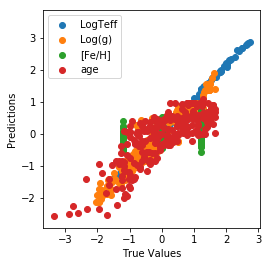

In [92]:
#test_predictions = model.predict([x_RVStrain, x_BPtrain, x_RPtrain])
test_predictions = model.predict([ x_RPtrain])
print(np.shape(test_predictions))
print(np.shape(y_train_stack[:,0]))
print(np.shape(y_train_stack[:,1]))
print(np.shape(y_train_stack[:,2]))
print(np.shape(y_train_stack[:,3]))
plt.scatter(normalize(y_train_stack[:,0]), test_predictions[:,0], label= 'LogTeff')
plt.scatter(normalize(y_train_stack[:,1]), test_predictions[:,1], label= 'Log(g)')
plt.scatter(normalize(y_train_stack[:,2]), test_predictions[:,2], label= '[Fe/H]')
plt.scatter(normalize(y_train_stack[:,3]), test_predictions[:,3], label= 'age')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.legend()
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([1.4, 1.4], [1.4, 1.4])
#print('test predictions=', test_predictions)

(237,)
(237,)
(237,)
(237,)
shape of test_predictions: (237, 4)
print 10 elements of test_predictions: [[-0.96988857  1.3632581   0.08370913  0.9634509 ]
 [-0.6705279  -1.0958918   0.30891174 -0.37200752]
 [ 0.16739735  0.26620162 -0.24047868 -0.09583161]
 [-1.2293181   1.3947154   0.5400733   0.8548107 ]
 [-0.57664245 -0.8206755   0.13961242 -0.13057902]
 [ 0.08003702  0.54628867 -0.3304817   0.10241326]
 [ 0.84146285  0.87998956 -0.22524656 -0.30557233]
 [-0.1407207   0.4634729  -0.42625538  0.366637  ]
 [-0.79988813  1.3539064  -0.15746705  0.97173584]
 [ 1.8149322   0.83920634 -0.09949162 -1.2700596 ]]


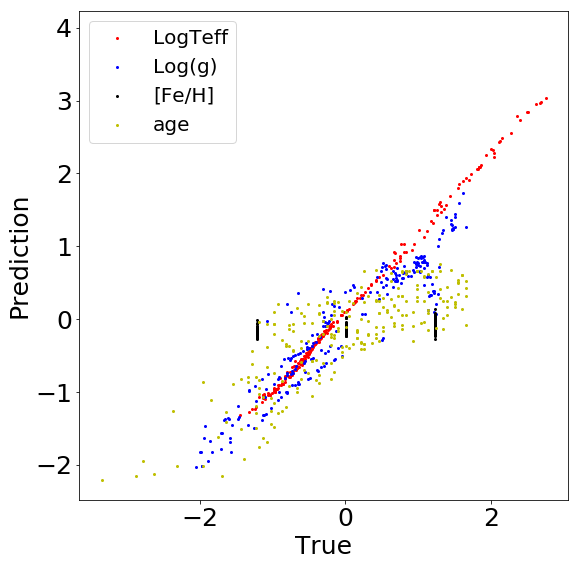

In [93]:
#Unnormalizing the labels (teff)

print(np.shape(y_train_stack[:,0]))
print(np.shape(y_train_stack[:,1]))
print(np.shape(y_train_stack[:,2]))
print(np.shape(y_train_stack[:,3]))



def denormalize (labels):
    mean_labels=np.mean(labels)
    std_labels=np.std(labels)
    return (((labels)*(std_labels)) + mean_labels)

plt.figure(figsize=(13,9))
#test_predictions = model.predict([x_RVStrain, x_BPtrain, x_RPtrain])
test_predictions = model.predict([x_RPtrain])
print('shape of test_predictions:',np.shape(test_predictions))
print('print 10 elements of test_predictions:', test_predictions[0:10])
plt.scatter(denormalize(y_train_stack[:,0]), denormalize(test_predictions[:,0]), s= 4.0, c= 'r', label='LogTeff' )
plt.scatter(denormalize(y_train_stack[:,1]), denormalize(test_predictions[:,1]), s= 4.0, c= 'b', label='Log(g)' )
plt.scatter(denormalize(y_train_stack[:,2]), denormalize(test_predictions[:,2]), s= 4.0, c= 'k', label='[Fe/H]' )
plt.scatter(denormalize(y_train_stack[:,3]), denormalize(test_predictions[:,3]), s= 4.0, c= 'y', label='age' )
plt.xlabel(r"True", fontsize=25)
plt.ylabel(r"Prediction", fontsize=25)
plt.axis('equal')
plt.axis('square')
# increase the x,y tick label size
plt.tick_params(labelsize= 25) 
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-2, 3], [-2, 3], color='green')
plt.legend(fontsize=20)




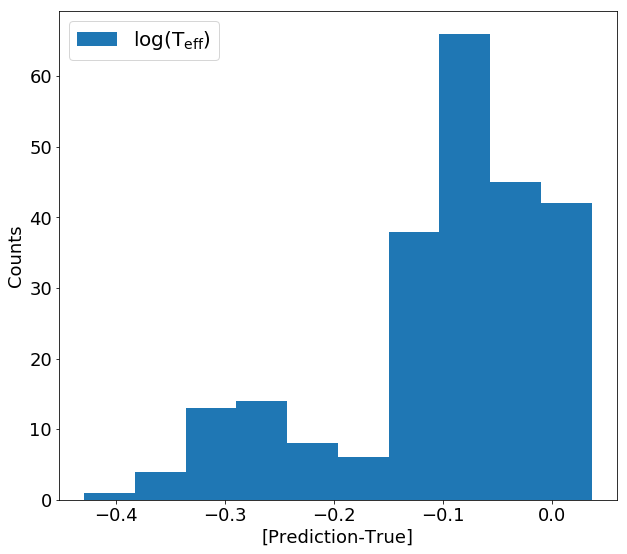

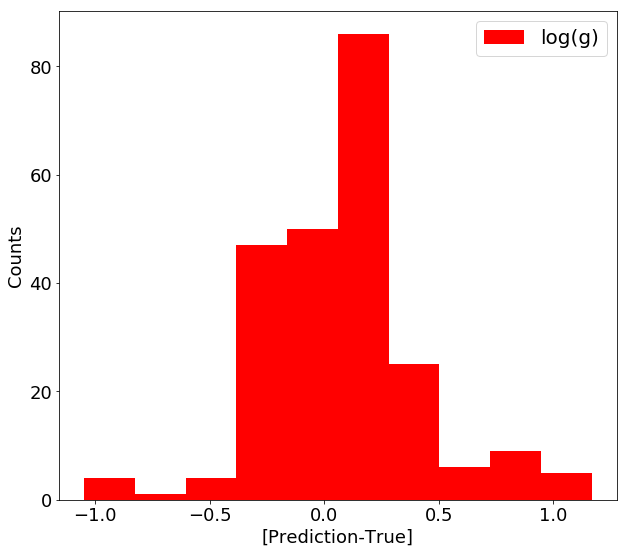

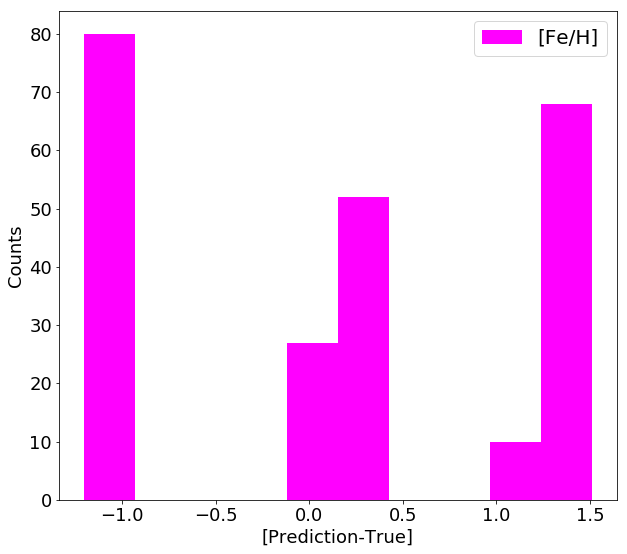

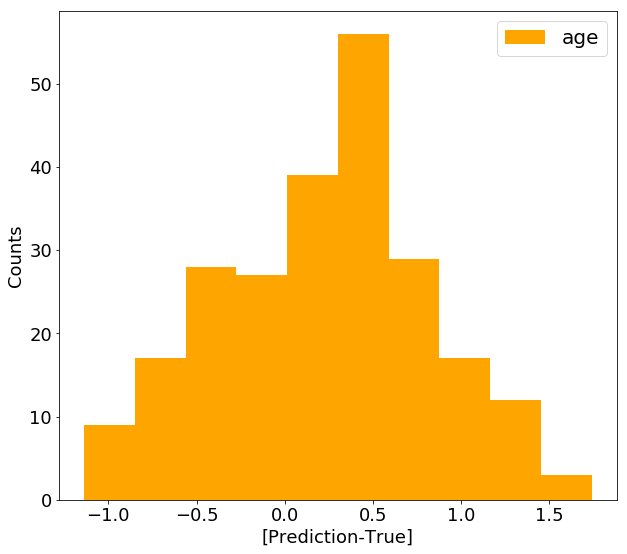

In [94]:
#Making the histogram of denormalized training set 

plt.figure(figsize=(10,9))
data_teff=np.subtract(denormalize(y_train_stack[:,0]), denormalize(test_predictions[:,0])) 
data_logg=np.subtract(denormalize(y_train_stack[:,1]), denormalize(test_predictions[:,1])) 
data_feh=np.subtract(denormalize(y_train_stack[:,2]), denormalize(test_predictions[:,2])) 
data_age=np.subtract(denormalize(y_train_stack[:,3]), denormalize(test_predictions[:,3])) 

counts_teff, bins_teff = np.histogram(data_teff)
counts_logg, bins_logg = np.histogram(data_logg)
counts_feh, bins_feh = np.histogram(data_feh)
counts_age, bins_age = np.histogram(data_age)


#histogram for LogTeff
plt.hist(bins_teff[:-1], bins_teff, weights=counts_teff, label= r'$\rm log(\rm T_{\rm eff})$')
plt.tick_params(labelsize=18) 
plt.xlabel(r'[Prediction-True]', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.legend(fontsize=20)
plt.show()

#histogram for Log(g)
plt.figure(figsize=(10,9))
plt.hist(bins_logg[:-1], bins_logg, weights=counts_logg, label= 'log(g)', color='red')
plt.tick_params(labelsize=18) 
plt.xlabel(r'[Prediction-True]', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.legend(fontsize=20)
plt.show()

#histogram for [Fe/H]
plt.figure(figsize=(10,9))
plt.hist(bins_feh[:-1], bins_feh, weights=counts_feh, label= '[Fe/H]', color='magenta')
plt.tick_params(labelsize=18) 
plt.xlabel(r'[Prediction-True]', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.legend(fontsize=20)
plt.show()

#histogram for age
plt.figure(figsize=(10,9))
plt.hist(bins_age[:-1], bins_age, weights=counts_age, label= 'age', color='orange')
plt.tick_params(labelsize=18) 
plt.xlabel(r'[Prediction-True]', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.legend(fontsize=20)
plt.show()




#print('standard deviation', len(z))
#print(len(z[teff<5000]))
#print(len(z))


# Training Data Set

In [95]:
# getting deviation in Teff bins
nbin = 6
teffbin_edges=np.array([-1.5, -0.5, 0., 0.5, 1.0, 1.5, 2.0])

# pred vs. true
# unnormalised values
teff_pred = denormalize(test_predictions[:,0])
teff_true = denormalize(y_train_stack[:,0]) #teff values are created by read_spectra1_updatedwavelength from the nsc Allende Prieto spectra library
teff_diff = teff_pred-teff_true

# compute mean and std in Teff bins
teff_diff_mean = np.zeros(nbin) 
teff_diff_std = np.zeros(nbin)
teffbin_mean = np.zeros(nbin)

for i in range(nbin): #iterations(0,1,2,3,4)
    if i==0:
        indx = np.where(teff_true<teffbin_edges[i]) #index of teff_true where teff true< 5000 since teff has all values of teff in each library
        #print(indx)
    elif i==nbin-1: #if i= 5-1= 4
        indx = np.where(teff_true>teffbin_edges[i-1]) #index of true_teff>20000
    else: #if i=1,2,3
        indx = np.where((teff_true>teffbin_edges[i-1]) & (teff_true<teffbin_edges[i]))
        #if i=1, teff_true>(teffbin_edges[1-1=0]= 5000) & teff_true<teffbin_edges[1]= 10000, so 5000<teff<10000
        #if i=2, teff_true>(teffbin_edges[2-1=1]=10000) & teff_true<teffbin_edges[2]= 15000, so 10000<teff<15000
        #if i=3, teff_true> (teffbin_edges[3-1=2]= 15000) & teff_true<teffbin_edges[3]= 20000 so 15000<teff<20000
    teffbin_mean[i] = np.mean(teff_true[indx]) #calculating the mean values of teff_true from assigning its index in the for loop
    teff_diff_mean[i] = np.mean(teff_diff[indx]) #calculating the mean values of teff_diff from its index 
    teff_diff_std[i] = np.std(teff_diff[indx]) #calculating the std values of teff-diff from its index
    
print('mean of bin teff_true=', teffbin_mean)
print('mean of teff_diff=', teff_diff_mean)
print('std of teff_diff=', teff_diff_std)
print('length of teff_diff=', len(teff_diff))

####################################################################################################################
print('=================================================================================================')
# getting deviation in Teff bins
nbin = 6
loggbin_edges=np.array([-1.5, -0.5, 0., 0.5, 1.0, 1.5, 2.0])

# pred vs. true
# unnormalised values
logg_pred = denormalize(test_predictions[:,1])
logg_true = denormalize(y_train_stack[:,1]) #teff values are created by read_spectra1_updatedwavelength from the nsc Allende Prieto spectra library
logg_diff = logg_pred-logg_true

# compute mean and std in Teff bins
logg_diff_mean = np.zeros(nbin) 
logg_diff_std = np.zeros(nbin)
loggbin_mean = np.zeros(nbin)

for i in range(nbin): #iterations(0,1,2,3,4)
    if i==0:
        indx = np.where(logg_true<loggbin_edges[i]) #index of teff_true where teff true< 5000 since teff has all values of teff in each library
        #print(indx)
    elif i==nbin-1: #if i= 5-1= 4
        indx = np.where(logg_true>loggbin_edges[i-1]) #index of true_teff>20000
    else: #if i=1,2,3
        indx = np.where((logg_true>loggbin_edges[i-1]) & (logg_true<loggbin_edges[i]))

    loggbin_mean[i] = np.mean(logg_true[indx]) #calculating the mean values of teff_true from assigning its index in the for loop
    logg_diff_mean[i] = np.mean(logg_diff[indx]) #calculating the mean values of teff_diff from its index 
    logg_diff_std[i] = np.std(logg_diff[indx]) #calculating the std values of teff-diff from its index
    
print('mean of bin logg_true=', loggbin_mean)
print('mean of logg_diff=', logg_diff_mean)
print('std of logg_diff=', logg_diff_std)
print('length of logg_diff=', len(logg_diff))




####################################################################################################################
print('=================================================================================================')
# getting deviation in feh bins
nbin = 6
fehbin_edges=np.array([-1.5, -0.5, 0., 0.5, 1.0, 1.5, 2.0])

# pred vs. true
# unnormalised values
feh_pred = denormalize(test_predictions[:,2])
feh_true = denormalize(y_train_stack[:,2]) #teff values are created by read_spectra1_updatedwavelength from the nsc Allende Prieto spectra library
feh_diff = feh_pred-feh_true

# compute mean and std in Teff bins
feh_diff_mean = np.zeros(nbin) 
feh_diff_std = np.zeros(nbin)
fehbin_mean = np.zeros(nbin)

for i in range(nbin): #iterations(0,1,2,3,4)
    if i==0:
        indx = np.where(feh_true<fehbin_edges[i]) #index of teff_true where teff true< 5000 since teff has all values of teff in each library
        #print(indx)
    elif i==nbin-1: #if i= 5-1= 4
        indx = np.where(feh_true>fehbin_edges[i-1]) #index of true_teff>20000
    else: #if i=1,2,3
        indx = np.where((feh_true>fehbin_edges[i-1]) & (feh_true<fehbin_edges[i]))

    fehbin_mean[i] = np.mean(feh_true[indx]) #calculating the mean values of teff_true from assigning its index in the for loop
    feh_diff_mean[i] = np.mean(feh_diff[indx]) #calculating the mean values of teff_diff from its index 
    feh_diff_std[i] = np.std(feh_diff[indx]) #calculating the std values of teff-diff from its index
    
print('mean of bin feh_true=', fehbin_mean)
print('mean of feh_diff=', feh_diff_mean)
print('std of feh_diff=', feh_diff_std)
print('length of feh_diff=', len(feh_diff))

####################################################################################################################
print('=================================================================================================')
# getting deviation in age bins
nbin = 6
agebin_edges=np.array([-1.5, -0.5, 0., 0.5, 1.0, 1.5, 2.0])

# pred vs. true
# unnormalised values
age_pred = denormalize(test_predictions[:,3])
age_true = denormalize(y_train_stack[:,3]) #teff values are created by read_spectra1_updatedwavelength from the nsc Allende Prieto spectra library
age_diff = feh_pred-feh_true

# compute mean and std in Teff bins
age_diff_mean = np.zeros(nbin) 
age_diff_std = np.zeros(nbin)
agebin_mean = np.zeros(nbin)

for i in range(nbin): #iterations(0,1,2,3,4)
    if i==0:
        indx = np.where(age_true<agebin_edges[i]) #index of teff_true where teff true< 5000 since teff has all values of teff in each library
        #print(indx)
    elif i==nbin-1: #if i= 5-1= 4
        indx = np.where(age_true>agebin_edges[i-1]) #index of true_teff>20000
    else: #if i=1,2,3
        indx = np.where((age_true>agebin_edges[i-1]) & (age_true<agebin_edges[i]))

    agebin_mean[i] = np.mean(age_true[indx]) #calculating the mean values of teff_true from assigning its index in the for loop
    age_diff_mean[i] = np.mean(age_diff[indx]) #calculating the mean values of teff_diff from its index 
    age_diff_std[i] = np.std(age_diff[indx]) #calculating the std values of teff-diff from its index
    
print('mean of bin age_true=', agebin_mean)
print('mean of age_diff=', age_diff_mean)
print('std of age_diff=', age_diff_std)
print('length of age_diff=', len(age_diff))




mean of bin teff_true= [        nan -0.81073464 -0.33385499  0.21566742  0.73185934  1.77537546]
mean of teff_diff= [       nan 0.02213119 0.08700459 0.1088871  0.12337965 0.25792323]
std of teff_diff= [       nan 0.03924665 0.02123555 0.01135204 0.07179372 0.07327991]
length of teff_diff= 237
mean of bin logg_true= [-1.78063549 -0.87263634 -0.2725804   0.33236045  0.7515497   1.23999515]
mean of logg_diff= [ 0.10233583  0.08668584  0.03621216  0.02102489 -0.14248066 -0.41770885]
std of logg_diff= [0.16966726 0.29267294 0.29708735 0.2888505  0.16291538 0.32551931]
length of logg_diff= 237
mean of bin feh_true= [        nan -1.21447434         nan  0.01033595         nan  1.23514624]
mean of feh_diff= [        nan  1.02249597         nan -0.16155384         nan -1.34639413]
std of feh_diff= [       nan 0.05019919        nan 0.05562777        nan 0.08532072]
length of feh_diff= 237
mean of bin age_true= [-2.16540856 -0.933776   -0.24213652  0.25453584  0.76820849  1.35103292]
mean of age

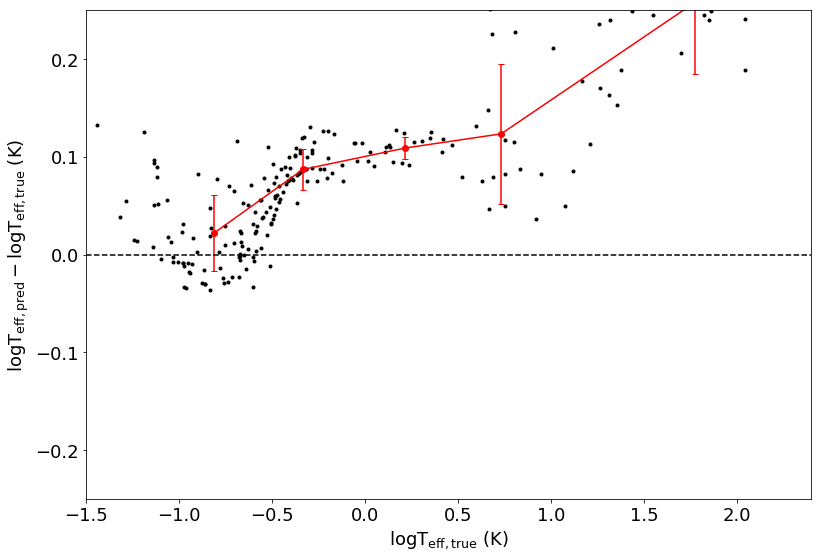

In [96]:
# plot of logteff
plt.figure(figsize=(13,9))
# plot the difference
plt.scatter(teff_true, teff_diff ,c='k', marker='.')
#plt.plot(teff_true, teff_diff,'o', markersize=1, c='k')

# plot mean (symbol) and scatter with error bars
plt.errorbar(teffbin_mean,teff_diff_mean, yerr=teff_diff_std, fmt='-o', c='r',capsize=3) #plotting the teff bin mean in x-axis and teff_diff in y-axis

# increase the x,y tick label size
plt.tick_params(labelsize=18) 

# set x, y label. 
plt.xlabel(r"$T_{\rm eff,true}$ (K)", fontsize=18)
plt.ylabel(r"$T_{\rm eff,pred}-T_{\rm eff,true}$ (K)", fontsize=18)

# set x, y lim plot range
xlim=np.array([-1.5,2.4])
ylim=np.array([-0.25,0.25])
plt.xlim(xlim[0],xlim[1]) #plotting the xlim
plt.ylim(ylim[0],ylim[1])

# set x, y label. 
plt.xlabel(r"$\rm logT_{\rm eff,true}$ (K)", fontsize=18)
plt.ylabel(r"$\rm logT_{\rm eff,pred}-\rm logT_{\rm eff,true}$ (K)", fontsize=18)

# draw y=0 line
xline = np.linspace(xlim[0],xlim[1], 2)
yline = np.zeros_like(xline)
plt.plot(xline,yline,linestyle='--',c='k')





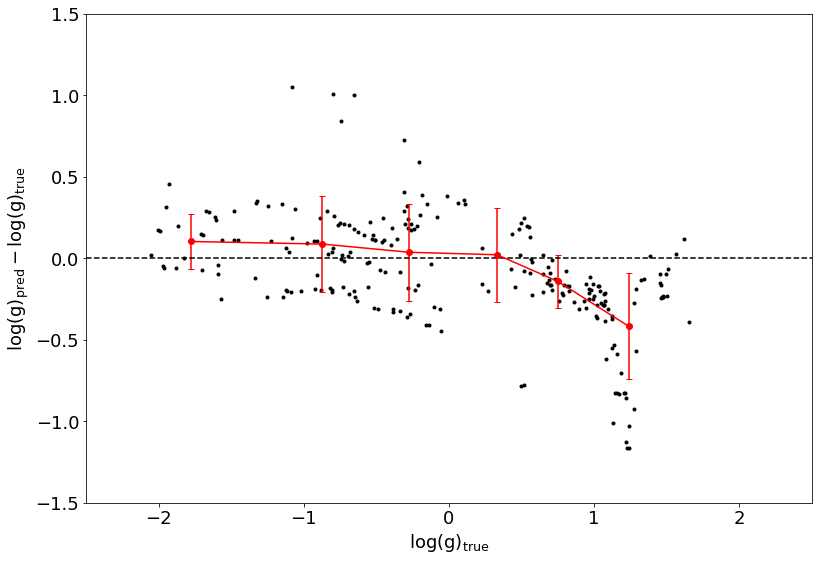

In [97]:
#Plot log 
plt.figure(figsize=(13,9))
# plot the difference
plt.scatter(logg_true, logg_diff ,c='k', marker='.')
#plt.plot(teff_true, teff_diff,'o', markersize=1, c='k')

# plot mean (symbol) and scatter with error bars
plt.errorbar(loggbin_mean,logg_diff_mean, yerr=logg_diff_std, fmt='-o', c='r',capsize=3) #plotting the teff bin mean in x-axis and teff_diff in y-axis

# increase the x,y tick label size
plt.tick_params(labelsize=18) 

# set x, y label. 
#plt.xlabel(r"$T_{\rm eff,true}$ (K)", fontsize=18)
#plt.ylabel(r"$T_{\rm eff,pred}-T_{\rm eff,true}$ (K)", fontsize=18)

# set x, y lim plot range
xlim=np.array([-2.5,2.5])
ylim=np.array([-1.5,1.5])
plt.xlim(xlim[0],xlim[1]) #plotting the xlim
plt.ylim(ylim[0],ylim[1])


# set x, y label. 
plt.xlabel(r"$\rm log(g)_{\rm true}$", fontsize=18)
plt.ylabel(r"$\rm log(g)_{\rm pred}-\rm log(g)_{\rm true}$", fontsize=18)



# draw y=0 line
xline = np.linspace(xlim[0],xlim[1], 2)
yline = np.zeros_like(xline)
plt.plot(xline,yline,linestyle='--',c='k')




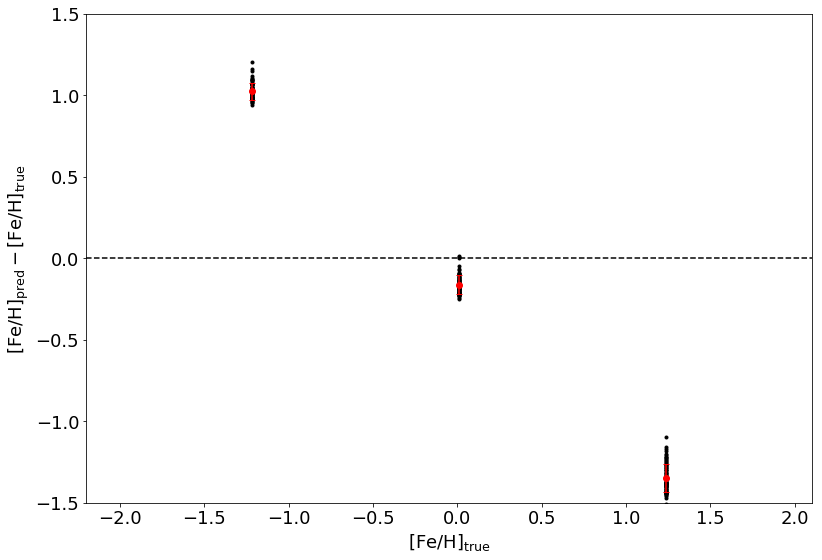

In [98]:
# plot of feh
plt.figure(figsize=(13,9))
# plot the difference
plt.scatter(feh_true, feh_diff ,c='k', marker='.')
#plt.plot(teff_true, teff_diff,'o', markersize=1, c='k')

# plot mean (symbol) and scatter with error bars
plt.errorbar(fehbin_mean, feh_diff_mean, yerr=feh_diff_std, fmt='-o', c='r',capsize=3) #plotting the teff bin mean in x-axis and teff_diff in y-axis

# increase the x,y tick label size
plt.tick_params(labelsize=18) 



# set x, y lim plot range
xlim=np.array([-2.2, 2.1])
ylim=np.array([-1.5, 1.5])
plt.xlim(xlim[0],xlim[1]) #plotting the xlim
plt.ylim(ylim[0],ylim[1])

# set x, y label. 
plt.xlabel(r"$\rm [Fe/H]_{\rm true}$", fontsize=18)
plt.ylabel(r"$\rm [Fe/H]_{\rm pred}-\rm [Fe/H]_{\rm true}$ ", fontsize=18)

# draw y=0 line
xline = np.linspace(xlim[0],xlim[1], 2)
yline = np.zeros_like(xline)
plt.plot(xline,yline,linestyle='--',c='k')




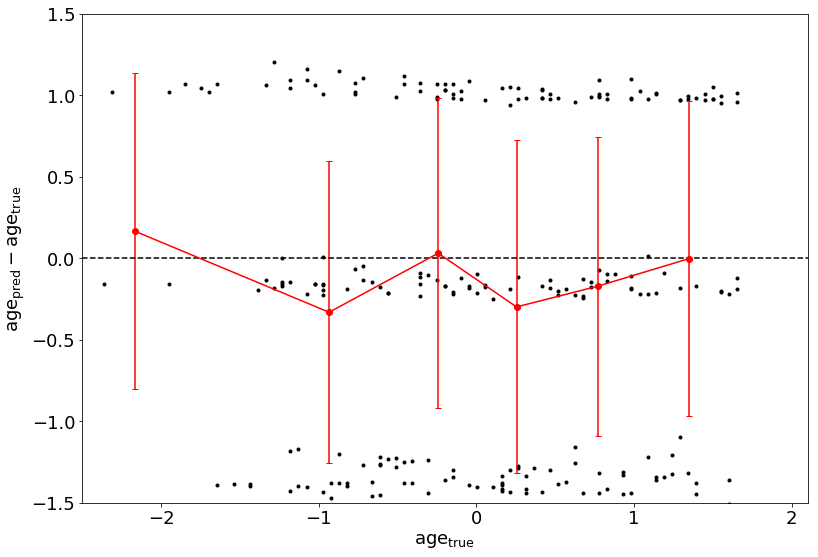

In [99]:
# plot of age
plt.figure(figsize=(13,9))
# plot the difference
plt.scatter(age_true, age_diff ,c='k', marker='.')
#plt.plot(teff_true, teff_diff,'o', markersize=1, c='k')

# plot mean (symbol) and scatter with error bars
plt.errorbar(agebin_mean, age_diff_mean, yerr=age_diff_std, fmt='-o', c='r',capsize=3) #plotting the teff bin mean in x-axis and teff_diff in y-axis

# increase the x,y tick label size
plt.tick_params(labelsize=18) 



# set x, y lim plot range
xlim=np.array([-2.5, 2.1])
ylim=np.array([-1.5,1.5])
plt.xlim(xlim[0],xlim[1]) #plotting the xlim
plt.ylim(ylim[0],ylim[1])

# set x, y label. 
plt.xlabel(r"$\rm age_{\rm true}$", fontsize=18)
plt.ylabel(r"$\rm age_{\rm pred}-\rm age_{\rm true}$ ", fontsize=18)

# draw y=0 line
xline = np.linspace(xlim[0],xlim[1], 2)
yline = np.zeros_like(xline)
plt.plot(xline,yline,linestyle='--',c='k')

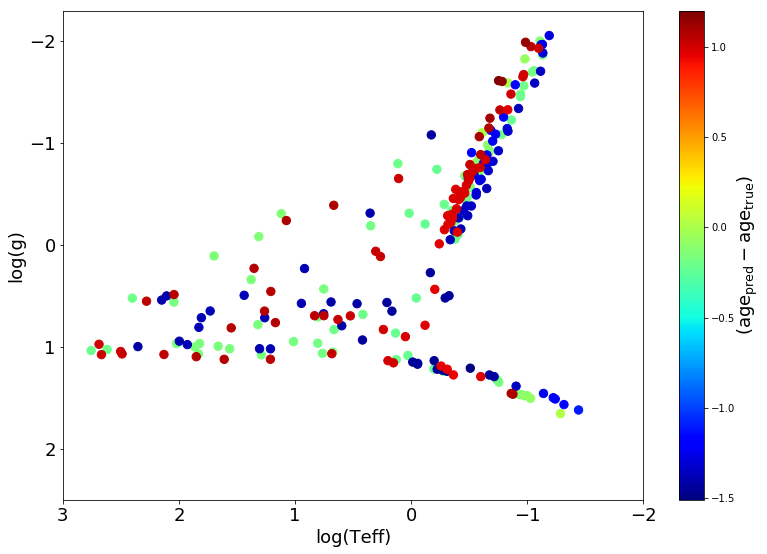

In [105]:

plt.figure(figsize=(13,9))
marker_size = 70
plt.scatter(teff_true, logg_true, s= marker_size, c= age_diff, cmap ='jet' )
plt.tick_params(labelsize=18)
plt.xlabel('log(Teff)', fontsize=18)
plt.ylabel('log(g)', fontsize=18)
plt.axis([3.0, -2.0, 2.5, -2.3])
cbar= plt.colorbar()
cbar.set_label(r"($\rm age_{\rm pred}-\rm age_{\rm true})$" , labelpad=+1, fontsize=18)
plt.show()




# Cross Validation Set

(63, 4)
len of y_cv_stack= 63


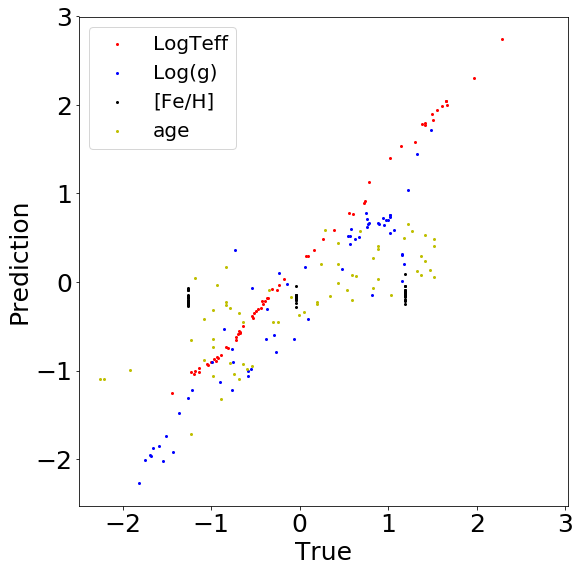

In [79]:
#Test set (x_cv)

plt.figure(figsize=(13,9))
#cv_predictions = model.predict([x_RVScv, x_BPcv, x_RPcv]).flatten()
cv_predictions = model.predict([x_RPcv])
print(np.shape(cv_predictions))

plt.scatter(denormalize(y_cv_stack[:,0]), denormalize(cv_predictions[:,0]), s= 4.0, c= 'r', label='LogTeff')
plt.scatter(denormalize(y_cv_stack[:,1]), denormalize(cv_predictions[:,1]), s= 4.0, c= 'b', label='Log(g)')
plt.scatter(denormalize(y_cv_stack[:,2]), denormalize(cv_predictions[:,2]), s= 4.0, c= 'k', label='[Fe/H]' )
plt.scatter(denormalize(y_cv_stack[:,3]), denormalize(cv_predictions[:,3]), s= 4.0, c= 'y', label='age' )

plt.xlabel(r"True", fontsize=25)
plt.ylabel(r"Prediction", fontsize=25)
plt.axis('equal')
plt.axis('square')
# increase the x,y tick label size
plt.tick_params(labelsize= 25) 
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-2, 3], [-2, 3], color='green')
plt.legend(fontsize=20)


print('len of y_cv_stack=', len(y_cv_stack))



In [80]:
# getting deviation in Teff bins
nbin = 6
teffbin_edges=np.array([-1.5, -0.5, 0., 0.5, 1.0, 1.5, 2.0])

# pred vs. true
# unnormalised values
teff_pred = denormalize(cv_predictions[:,0])
teff_true = denormalize(y_cv_stack[:,0]) #teff values are created by read_spectra1_updatedwavelength from the nsc Allende Prieto spectra library
teff_diff = teff_pred-teff_true

# compute mean and std in Teff bins
teff_diff_mean = np.zeros(nbin) 
teff_diff_std = np.zeros(nbin)
teffbin_mean = np.zeros(nbin)

for i in range(nbin): #iterations(0,1,2,3,4)
    if i==0:
        indx = np.where(teff_true<teffbin_edges[i]) #index of teff_true where teff true< 5000 since teff has all values of teff in each library
        #print(indx)
    elif i==nbin-1: #if i= 5-1= 4
        indx = np.where(teff_true>teffbin_edges[i-1]) #index of true_teff>20000
    else: #if i=1,2,3
        indx = np.where((teff_true>teffbin_edges[i-1]) & (teff_true<teffbin_edges[i]))
        #if i=1, teff_true>(teffbin_edges[1-1=0]= 5000) & teff_true<teffbin_edges[1]= 10000, so 5000<teff<10000
        #if i=2, teff_true>(teffbin_edges[2-1=1]=10000) & teff_true<teffbin_edges[2]= 15000, so 10000<teff<15000
        #if i=3, teff_true> (teffbin_edges[3-1=2]= 15000) & teff_true<teffbin_edges[3]= 20000 so 15000<teff<20000
    teffbin_mean[i] = np.mean(teff_true[indx]) #calculating the mean values of teff_true from assigning its index in the for loop
    teff_diff_mean[i] = np.mean(teff_diff[indx]) #calculating the mean values of teff_diff from its index 
    teff_diff_std[i] = np.std(teff_diff[indx]) #calculating the std values of teff-diff from its index
    
print('mean of bin teff_true=', teffbin_mean)
print('mean of teff_diff=', teff_diff_mean)
print('std of teff_diff=', teff_diff_std)
print('length of teff_diff=', len(teff_diff))

####################################################################################################################
print('=================================================================================================')
# getting deviation in Teff bins
nbin = 6
loggbin_edges=np.array([-1.5, -0.5, 0., 0.5, 1.0, 1.5, 2.0])

# pred vs. true
# unnormalised values
logg_pred = denormalize(cv_predictions[:,1])
logg_true = denormalize(y_cv_stack[:,1]) #teff values are created by read_spectra1_updatedwavelength from the nsc Allende Prieto spectra library
logg_diff = logg_pred-logg_true

# compute mean and std in Teff bins
logg_diff_mean = np.zeros(nbin) 
logg_diff_std = np.zeros(nbin)
loggbin_mean = np.zeros(nbin)

for i in range(nbin): #iterations(0,1,2,3,4)
    if i==0:
        indx = np.where(logg_true<loggbin_edges[i]) #index of teff_true where teff true< 5000 since teff has all values of teff in each library
        #print(indx)
    elif i==nbin-1: #if i= 5-1= 4
        indx = np.where(logg_true>loggbin_edges[i-1]) #index of true_teff>20000
    else: #if i=1,2,3
        indx = np.where((logg_true>loggbin_edges[i-1]) & (logg_true<loggbin_edges[i]))

    loggbin_mean[i] = np.mean(logg_true[indx]) #calculating the mean values of teff_true from assigning its index in the for loop
    logg_diff_mean[i] = np.mean(logg_diff[indx]) #calculating the mean values of teff_diff from its index 
    logg_diff_std[i] = np.std(logg_diff[indx]) #calculating the std values of teff-diff from its index
    
print('mean of bin logg_true=', loggbin_mean)
print('mean of logg_diff=', logg_diff_mean)
print('std of logg_diff=', logg_diff_std)
print('length of logg_diff=', len(logg_diff))




####################################################################################################################
print('=================================================================================================')
# getting deviation in feh bins
nbin = 6
fehbin_edges=np.array([-1.5, -0.5, 0., 0.5, 1.0, 1.5, 2.0])

# pred vs. true
# unnormalised values
feh_pred = denormalize(cv_predictions[:,2])
feh_true = denormalize(y_cv_stack[:,2]) #teff values are created by read_spectra1_updatedwavelength from the nsc Allende Prieto spectra library
feh_diff = feh_pred-feh_true

# compute mean and std in Teff bins
feh_diff_mean = np.zeros(nbin) 
feh_diff_std = np.zeros(nbin)
fehbin_mean = np.zeros(nbin)

for i in range(nbin): #iterations(0,1,2,3,4)
    if i==0:
        indx = np.where(feh_true<fehbin_edges[i]) #index of teff_true where teff true< 5000 since teff has all values of teff in each library
        #print(indx)
    elif i==nbin-1: #if i= 5-1= 4
        indx = np.where(feh_true>fehbin_edges[i-1]) #index of true_teff>20000
    else: #if i=1,2,3
        indx = np.where((feh_true>fehbin_edges[i-1]) & (feh_true<fehbin_edges[i]))

    fehbin_mean[i] = np.mean(feh_true[indx]) #calculating the mean values of teff_true from assigning its index in the for loop
    feh_diff_mean[i] = np.mean(feh_diff[indx]) #calculating the mean values of teff_diff from its index 
    feh_diff_std[i] = np.std(feh_diff[indx]) #calculating the std values of teff-diff from its index
    
print('mean of bin feh_true=', fehbin_mean)
print('mean of feh_diff=', feh_diff_mean)
print('std of feh_diff=', feh_diff_std)
print('length of feh_diff=', len(feh_diff))

####################################################################################################################
print('=================================================================================================')
# getting deviation in age bins
nbin = 3
agebin_edges=np.array([-2.0, 0, 2.0])

# pred vs. true
# unnormalised values
age_pred = denormalize(cv_predictions[:,3])
age_true = denormalize(y_cv_stack[:,3]) #teff values are created by read_spectra1_updatedwavelength from the nsc Allende Prieto spectra library
age_diff = feh_pred-feh_true

# compute mean and std in Teff bins
age_diff_mean = np.zeros(nbin) 
age_diff_std = np.zeros(nbin)
agebin_mean = np.zeros(nbin)

for i in range(nbin): #iterations(0,1,2,3,4)
    if i==0:
        indx = np.where(age_true<agebin_edges[i]) #index of teff_true where teff true< 5000 since teff has all values of teff in each library
        #print(indx)
    elif i==nbin-1: #if i= 5-1= 4
        indx = np.where(age_true>agebin_edges[i-1]) #index of true_teff>20000
    else: #if i=1,2,3
        indx = np.where((age_true>agebin_edges[i-1]) & (age_true<agebin_edges[i]))

    agebin_mean[i] = np.mean(age_true[indx]) #calculating the mean values of teff_true from assigning its index in the for loop
    age_diff_mean[i] = np.mean(age_diff[indx]) #calculating the mean values of teff_diff from its index 
    age_diff_std[i] = np.std(age_diff[indx]) #calculating the std values of teff-diff from its index
    
print('mean of bin age_true=', agebin_mean)
print('mean of age_diff=', age_diff_mean)
print('std of age_diff=', age_diff_std)
print('length of age_diff=', len(age_diff))



        

mean of bin teff_true= [        nan -0.88825876 -0.36113288  0.19653547  0.68100318  1.53604193]
mean of teff_diff= [       nan 0.11672728 0.1829292  0.20757315 0.21643167 0.37569322]
std of teff_diff= [       nan 0.04141307 0.02351875 0.01413085 0.06584631 0.04155711]
length of teff_diff= 63
mean of bin logg_true= [-1.65529173 -0.8867512  -0.25065576  0.21204579  0.77021781  1.14984451]
mean of logg_diff= [-0.30601849 -0.05546152 -0.16567733 -0.24614034 -0.18978127 -0.44577945]
std of logg_diff= [0.09387871 0.41867161 0.32069983 0.25942871 0.21279684 0.41062651]
length of logg_diff= 63
mean of bin feh_true= [        nan -1.26458187 -0.03891021         nan         nan  1.18676144]
mean of feh_diff= [        nan  1.08128059 -0.13378746         nan         nan -1.32022293]
std of feh_diff= [       nan 0.06145261 0.04231283        nan        nan 0.07100083]
length of feh_diff= 63
mean of bin age_true= [-2.23241208 -0.79548846  0.86043718]
mean of age_diff= [-0.11648214 -0.10444372 -0.2177

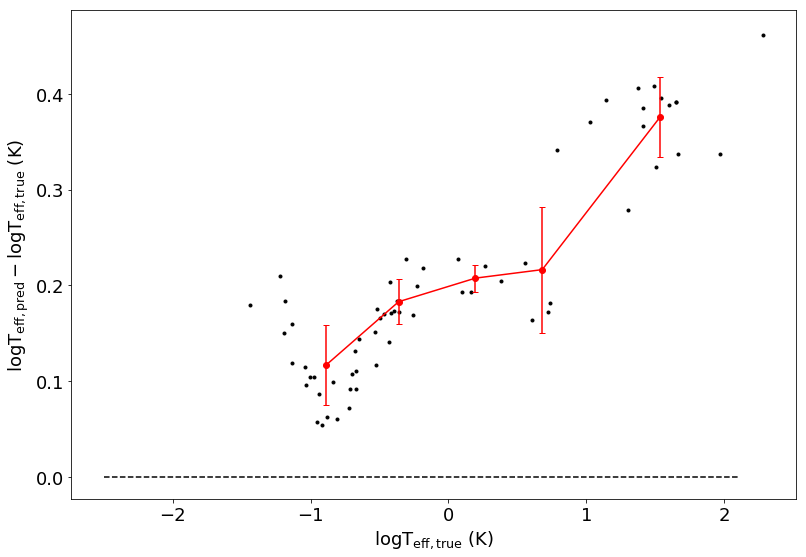

In [81]:

# plot of logteff
plt.figure(figsize=(13,9))
# plot the difference
plt.scatter(teff_true, teff_diff ,c='k', marker='.')
#plt.plot(teff_true, teff_diff,'o', markersize=1, c='k')

# plot mean (symbol) and scatter with error bars
plt.errorbar(teffbin_mean,teff_diff_mean, yerr=teff_diff_std, fmt='-o', c='r',capsize=3) #plotting the teff bin mean in x-axis and teff_diff in y-axis

# increase the x,y tick label size
plt.tick_params(labelsize=18) 

# set x, y label. 
plt.xlabel(r"$T_{\rm eff,true}$ (K)", fontsize=18)
plt.ylabel(r"$T_{\rm eff,pred}-T_{\rm eff,true}$ (K)", fontsize=18)

# set x, y lim plot range
#xlim=np.array([-1.5,2.4])
#ylim=np.array([-0.25,0.25])
#plt.xlim(xlim[0],xlim[1]) #plotting the xlim
#plt.ylim(ylim[0],ylim[1])

# set x, y label. 
plt.xlabel(r"$\rm logT_{\rm eff,true}$ (K)", fontsize=18)
plt.ylabel(r"$\rm logT_{\rm eff,pred}-\rm logT_{\rm eff,true}$ (K)", fontsize=18)

# draw y=0 line
xline = np.linspace(xlim[0],xlim[1], 2)
yline = np.zeros_like(xline)
plt.plot(xline,yline,linestyle='--',c='k')





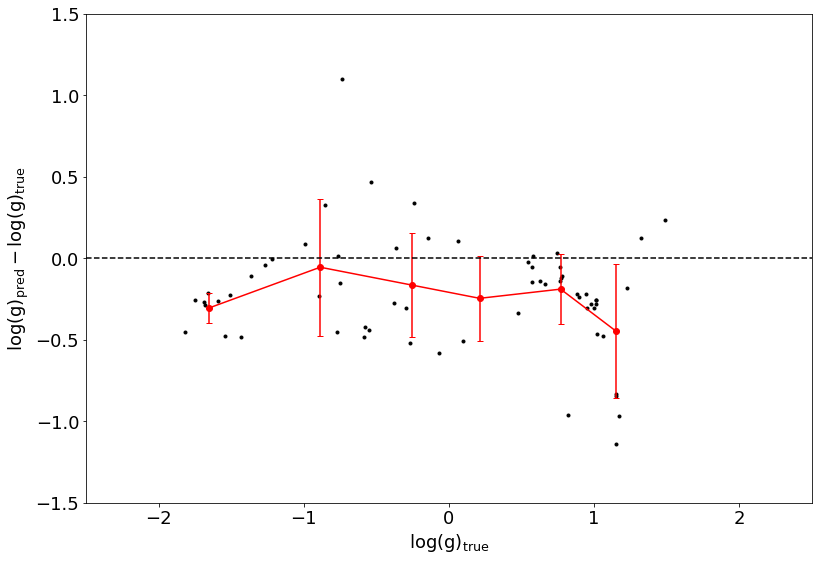

In [82]:
#Plot log 
plt.figure(figsize=(13,9))
# plot the difference
plt.scatter(logg_true, logg_diff ,c='k', marker='.')
#plt.plot(teff_true, teff_diff,'o', markersize=1, c='k')

# plot mean (symbol) and scatter with error bars
plt.errorbar(loggbin_mean,logg_diff_mean, yerr=logg_diff_std, fmt='-o', c='r',capsize=3) #plotting the teff bin mean in x-axis and teff_diff in y-axis

# increase the x,y tick label size
plt.tick_params(labelsize=18) 

# set x, y label. 
#plt.xlabel(r"$T_{\rm eff,true}$ (K)", fontsize=18)
#plt.ylabel(r"$T_{\rm eff,pred}-T_{\rm eff,true}$ (K)", fontsize=18)

# set x, y lim plot range
xlim=np.array([-2.5,2.5])
ylim=np.array([-1.5,1.5])
plt.xlim(xlim[0],xlim[1]) #plotting the xlim
plt.ylim(ylim[0],ylim[1])


# set x, y label. 
plt.xlabel(r"$\rm log(g)_{\rm true}$", fontsize=18)
plt.ylabel(r"$\rm log(g)_{\rm pred}-\rm log(g)_{\rm true}$", fontsize=18)



# draw y=0 line
xline = np.linspace(xlim[0],xlim[1], 2)
yline = np.zeros_like(xline)
plt.plot(xline,yline,linestyle='--',c='k')



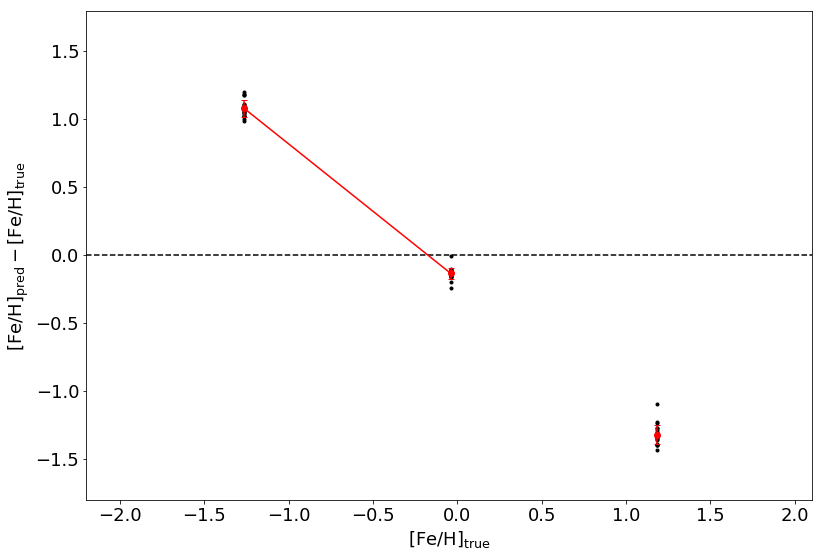

In [83]:
# plot of feh
plt.figure(figsize=(13,9))
# plot the difference
plt.scatter(feh_true, feh_diff ,c='k', marker='.')
#plt.plot(teff_true, teff_diff,'o', markersize=1, c='k')

# plot mean (symbol) and scatter with error bars
plt.errorbar(fehbin_mean, feh_diff_mean, yerr=feh_diff_std, fmt='-o', c='r',capsize=3) #plotting the teff bin mean in x-axis and teff_diff in y-axis

# increase the x,y tick label size
plt.tick_params(labelsize=18) 



# set x, y lim plot range
xlim=np.array([-2.2, 2.1])
ylim=np.array([-1.8, 1.8])
plt.xlim(xlim[0],xlim[1]) #plotting the xlim
plt.ylim(ylim[0],ylim[1])

# set x, y label. 
plt.xlabel(r"$\rm [Fe/H]_{\rm true}$", fontsize=18)
plt.ylabel(r"$\rm [Fe/H]_{\rm pred}-\rm [Fe/H]_{\rm true}$ ", fontsize=18)

# draw y=0 line
xline = np.linspace(xlim[0],xlim[1], 2)
yline = np.zeros_like(xline)
plt.plot(xline,yline,linestyle='--',c='k')


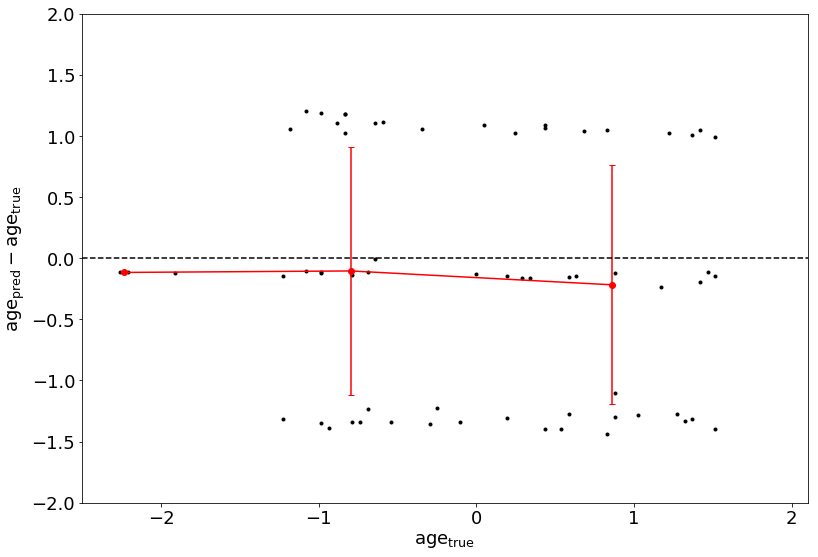

In [84]:
# plot of age
plt.figure(figsize=(13,9))
# plot the difference
plt.scatter(age_true, age_diff ,c='k', marker='.')
#plt.plot(teff_true, teff_diff,'o', markersize=1, c='k')

# plot mean (symbol) and scatter with error bars
plt.errorbar(agebin_mean, age_diff_mean, yerr=age_diff_std, fmt='-o', c='r',capsize=3) #plotting the teff bin mean in x-axis and teff_diff in y-axis

# increase the x,y tick label size
plt.tick_params(labelsize=18) 



# set x, y lim plot range
xlim=np.array([-2.5, 2.1])
ylim=np.array([-2.0, 2.0])
plt.xlim(xlim[0],xlim[1]) #plotting the xlim
plt.ylim(ylim[0],ylim[1])

# set x, y label. 
plt.xlabel(r"$\rm age_{\rm true}$", fontsize=18)
plt.ylabel(r"$\rm age_{\rm pred}-\rm age_{\rm true}$ ", fontsize=18)

# draw y=0 line
xline = np.linspace(xlim[0],xlim[1], 2)
yline = np.zeros_like(xline)
plt.plot(xline,yline,linestyle='--',c='k')

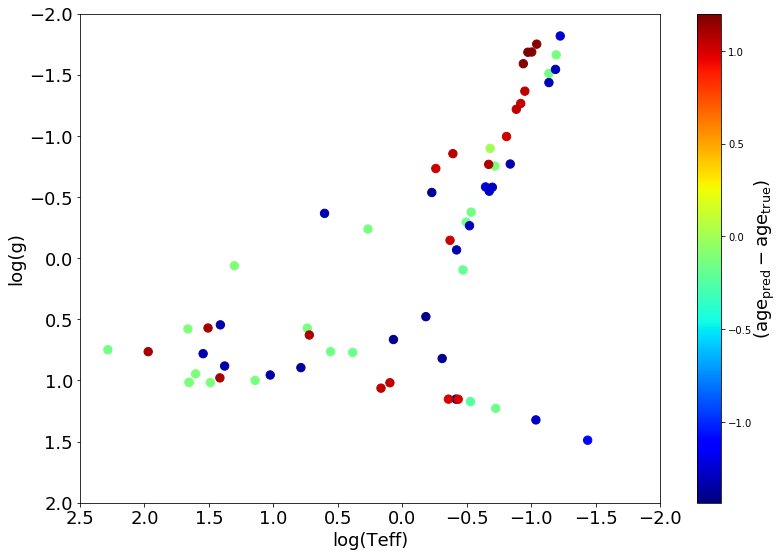

In [91]:

plt.figure(figsize=(13,9))
marker_size = 70
plt.scatter(teff_true, logg_true, s= marker_size, c= age_diff, cmap ='jet' )
plt.tick_params(labelsize=18)
plt.xlabel('log(Teff)', fontsize=18)
plt.ylabel('log(g)', fontsize=18)
plt.axis([2.5, -2.0, 2.0, -2.0])
cbar= plt.colorbar()
cbar.set_label(r"($\rm age_{\rm pred}-\rm age_{\rm true})$" , labelpad=+1, fontsize=18)
plt.show()


